# Demo Notebook

This notebook helps you test and debug ASTR 513 HW 3.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import numpy as jnp
from matplotlib import pyplot as plt

## Part 1

Make sure we can import different parts.

In [3]:
from hw3 import p2, p3, p4, p5

## Part 2

Use a harmonic oscillator to test `RK4()` in part 2.

In [4]:
def rhs(xv):
    """d^2 x/dt^2 = -x => d(x,v)/dt = (v,-x)"""
    x, v = xv
    return jnp.array([v, -x])

XV, T = p2.RK4(rhs, [0, 0.1], 0, 2*jnp.pi/100, 100)

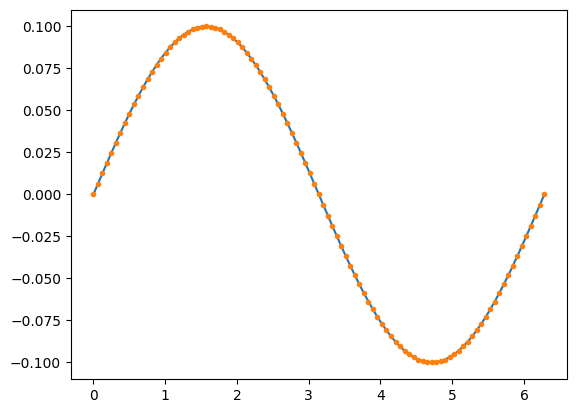

In [5]:
X, V = XV.T
plt.plot(T, 0.1 * jnp.sin(T))
plt.plot(T, X, '.')

## Part 3

Use a harmonic oscillator to test `ELrhs()` in part 3.

In [6]:
def L(x, v):
    return 0.5 * jnp.sum(v*v - x*x)

rhs = p3.ELrhs(L)

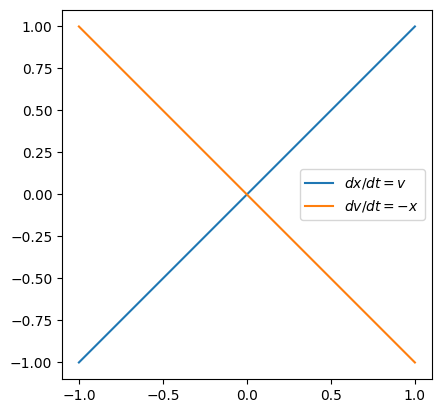

In [7]:
X = jnp.linspace(-1,1,21)
V = jnp.linspace(-1,1,21)

plt.plot(V, [rhs(jnp.array([0.0,v]))[0] for v in V], label=r"$dx/dt =  v$")
plt.plot(X, [rhs(jnp.array([x,0.0]))[1] for x in X], label=r"$dv/dt = -x$")
plt.gca().set_aspect('equal')
plt.legend()

## Part 4

Test the Lagrangian for double pendulum.

In [8]:
p4.L([1,2], [3,4])

Array(12.51086, dtype=float32, weak_type=True)

In [9]:
rhs = p3.ELrhs(p4.L)

rhs(jnp.array([1,2,3,4], dtype=float))

Array([ 3.      ,  4.      , -9.004401, 21.080181], dtype=float32)

## Part 5

Solve the double pendulum problem.

In [10]:
X, V, T = p5.solve(jnp.pi, jnp.pi/4, 0, 0, 100, 0.1)

Theta1, Theta2 = X.T

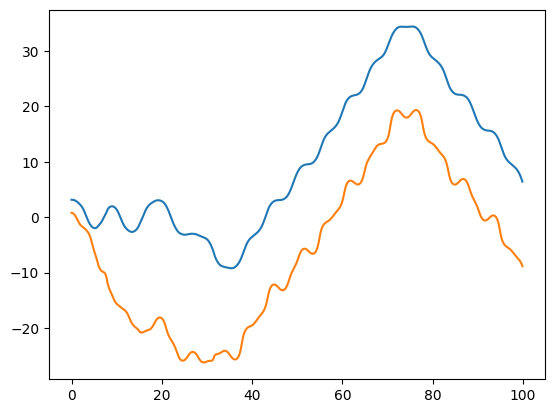

In [11]:
plt.plot(T, Theta1)
plt.plot(T, Theta2)

In [12]:
# Make animation

from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
from tqdm import tqdm

def animate(Theta1, Theta2):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_aspect('equal')

    frames = []
    for theta1, theta2 in tqdm(zip(Theta1, Theta2)):
        x1, y1 =      jnp.sin(theta1),    - jnp.cos(theta1)
        x2, y2 = x1 + jnp.sin(theta2), y1 - jnp.cos(theta2)
        f = ax.plot([0, x1, x2], [0, y1, y2], 'C0o-', animated=True)
        frames.append(f)
        plt.close()
    
    return ArtistAnimation(fig, frames, interval=40)

In [13]:
anim = animate(Theta1, Theta2)

HTML(anim.to_html5_video())  # display animation
# anim.save('movie.mp4')       # save animation

1000it [00:01, 808.43it/s]
